<a href="https://colab.research.google.com/github/Niloykrdey/Covid19/blob/main/Covid19project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 OUTBREAK PREDICTION USING MACHINE LEARNING** **bold text**

A strong model that predicts how the virus could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the virus in the next 7 days.The model was built on a test dataset updated till April,’20. The data sets are obtained from ‘John Hopkins University Coronavirus Resource Centre’

The total task is divided into 4 parts:
1.Analysing the present condition in India
2.Is this trend similar to Italy/South Korea/ Wuhan
3.Exploring the world wide data
4.Forecasting the worldwide COVID-19 cases using Prophet

In here we import a few important libraries that we  used throughout the model. Pandas is an extremely fast and flexible data analysis and manipulation tool and allows to store and manipulate tabular data. I also import visualisation libraries such as matplotlib, seaborn and plotly.Default plot size is defined and disabled warnings.

In [ ]:
# importing the required libraries
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

## **Part 1: Analysing the present condition in India**

### **1.1 Reading the Datasets**
At first a data frame is created using pandas.

In [ ]:
# Reading the datasets
df= pd.read_excel('/content/Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


## **1.2 Analysing COVID19 Cases in India**
A new attribute called total case is created.
This attribute is the total number of confirmed cases (Indian National + Foreign National)

In [ ]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('/content/Indian Coordinates.xlsx')
#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")


In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 729


The data is highlited according to its geographical location in India.The redder the cell the bigger the value. So, the darker cells represent a higher number of affected cases and the lighter ones show otherwise.

In [ ]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


### **1.3 Number of Active COVID-19 cases in affected State/Union Territories**

In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 648


,Total Active
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


### **1.4 Confirmed vs Recovered figures**

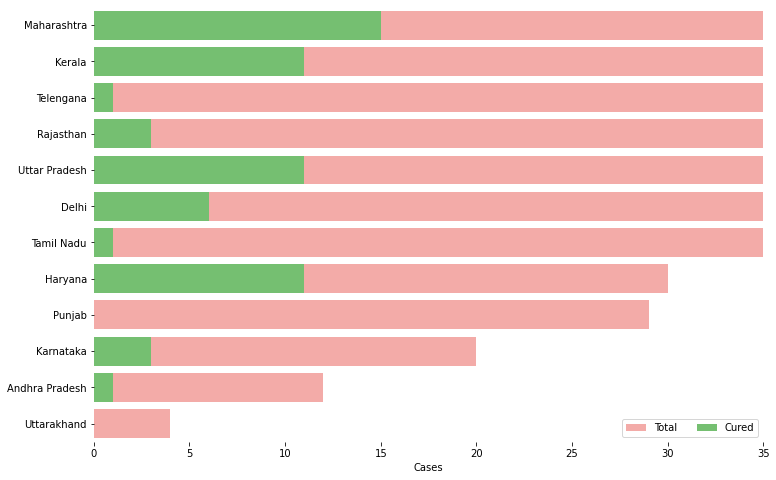

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)


In [ ]:
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

<Figure size 720x864 with 0 Axes>

### **1.5 The rise of corona cases in India**

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## **Part 2: Is the trend Similar to Italy, Wuhan & South Korea?**

India crossed 500 cases .cases started to double and graph is exponential.

### **2.1 Cumulative cases in India, Italy, S.Korea, and Wuhan**

In [ ]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)
'''Colour Scale for plotly
<a href="https://plot.ly/python/builtin-colorscales/">https://plot.ly/python/builtin-colorscales/</a>
'''
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

From the visualization it can be conclude:

1.Confirmed cases in India is rising exponentially with no fixed pattern (Very less test in India)

2.Confirmed cases in Italy is rising exponentially with a certain fixed pattern
Confirmed cases in S.Korea is rising gradually

3.There have been almost a negligible number confirmed cases in Wuhan a week.

### **2.2 Comparison between the rise of cases in Wuhan, S.Korea, Italy and India**

In [ ]:
# import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))
fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)
fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)
fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)
# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

### **2.3 Trend after crossing 100 cases**

In [ ]:
# import plotly.graph_objects as go
title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']
mode_size = [10, 10, 12]
line_size = [1, 1, 8]
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')
fig.show()

## **Part 3: Exploring Worldwide Data**

The following code gives tabular data about the location and status of confirmed cases by date.

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0,0,0
1,2020-01-22,Australia,New South Wales,0,0,0
2,2020-01-22,Australia,Northern Territory,0,0,0
3,2020-01-22,Australia,Queensland,0,0,0
4,2020-01-22,Australia,South Australia,0,0,0


In [ ]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


## **Part 4: Forecasting Total Number of Cases Worldwide**

In this segment,a week ahead forecast of confirmed cases of COVID-19 using Prophet is generated, with specific prediction intervals by creating a base model both with and without tweaking of seasonality-related parameters and additional regressors.

In [ ]:
from fbprophet import Prophet
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()



The input to Prophet is always a data frame with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric and represents the measurement we wish to forecast.

In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


### **4.1 Forecasting Confirmed COVID-19 Cases Worldwide with Prophet (Base model)**

Generating a week ahead forecast of confirmed cases of COVID-19 using Prophet, with a 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [ ]:
m = Prophet(interval_width=0.95) 
m.fit(confirmed) 
future = m.make_future_dataframe(periods=7) 
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


The **predict** method will assign each row in future a predicted value which it names** yhat**. If historical dates is passed, it will provide an in-sample fit. The **forecast object** here is a new data-frame that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674593e+07,1.658657e+07,1.690808e+07
191,2020-07-31,1.696120e+07,1.680173e+07,1.711417e+07
192,2020-08-01,1.716899e+07,1.700912e+07,1.733726e+07
193,2020-08-02,1.736665e+07,1.718759e+07,1.753741e+07
194,2020-08-03,1.756134e+07,1.738920e+07,1.774931e+07


The forecast is plotted by calling the Prophet.plot method and passing in your forecast data frame.

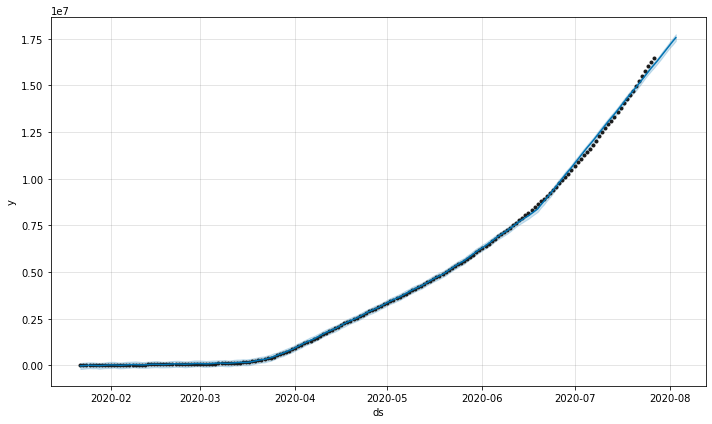

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

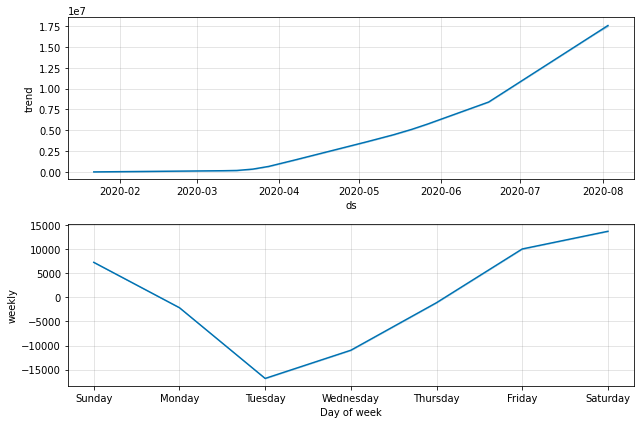

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)


### **Forecasting Worldwide Deaths using Prophet (Base model)**

Generating a week ahead forecast of confirmed cases of COVID-19 using the Machine Learning library – Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,663491.089245,659913.811806,666663.834665
191,2020-07-31,669006.329954,665384.362940,672924.145358
192,2020-08-01,673888.117495,669535.927261,678437.048952
193,2020-08-02,678025.694519,673252.629880,683476.640864
194,2020-08-03,682315.120343,676562.599442,688369.153720


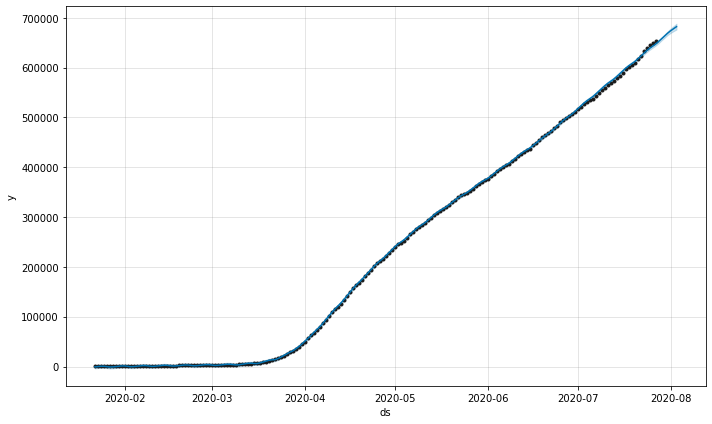

In [ ]:
deaths_forecast_plot = m.plot(forecast)


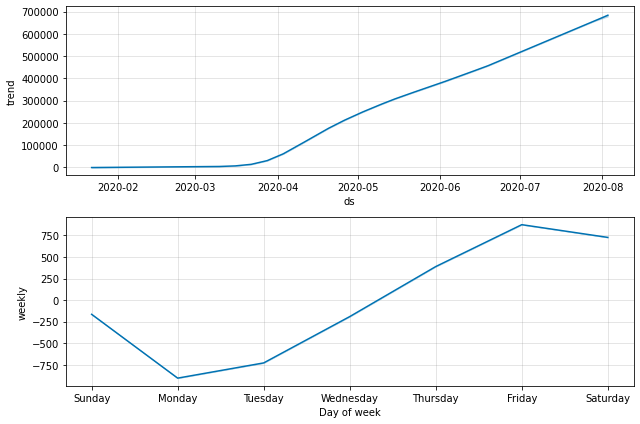

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)


### **4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)**

Generating a week ahead forecast of confirmed cases of COVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


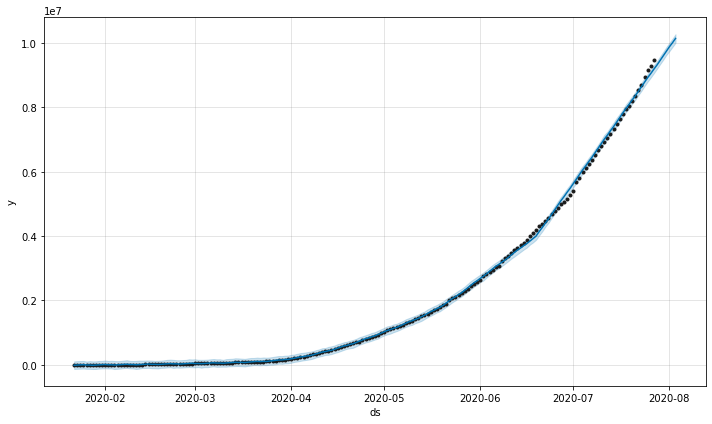

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()
 
 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
 
 
recovered_forecast_plot = m.plot(forecast)

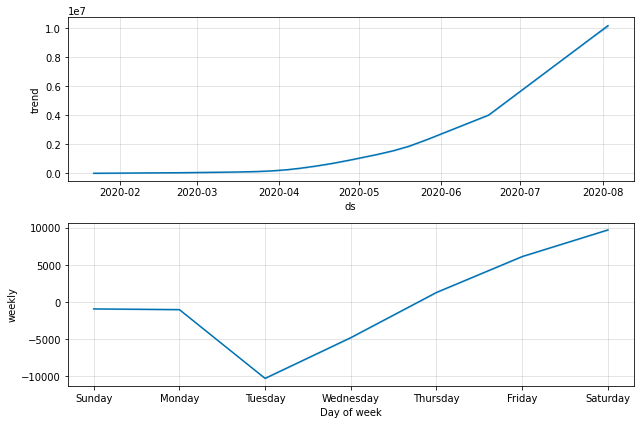

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)
